In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [52]:
df = pd.read_excel("CVD.xlsx")

In [53]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
186,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0
105,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
102,63,0,1,140,195,0,1,179,0,0.0,2,2,2,1


In [54]:
df_clean = df.drop_duplicates()

In [55]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [56]:
df_clean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [57]:
df_clean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [58]:
df_clean.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [59]:
# Identify categorical variables
continuous_var = []
categorical_var = []
for i in df_clean.columns:
    if df_clean[i].nunique() > 6:         
        continuous_var.append(i)
    else:
        categorical_var.append(i)               
print("Continous:\n ",continuous_var)
print('Categorical:\n ',categorical_var)

Continous:
  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Categorical:
  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


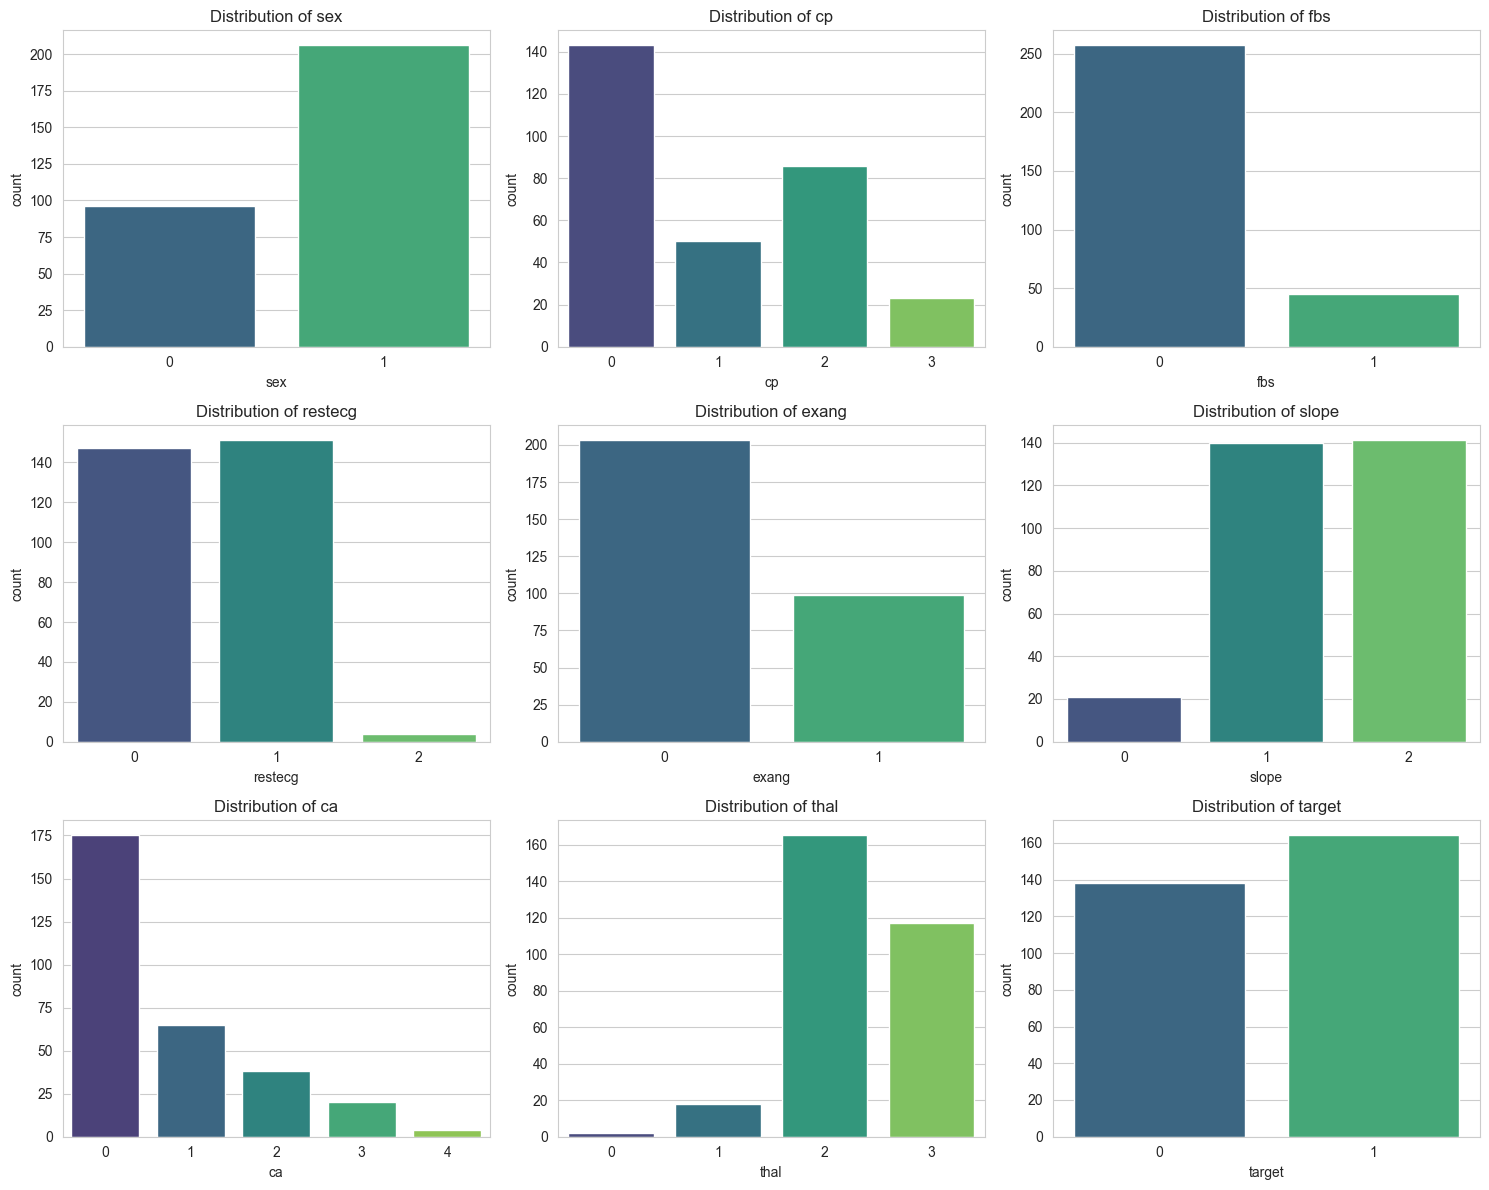

In [60]:
# Plot count plots for categorical variables
fig , axes = plt.subplots(3,3, figsize = (15,12))
axes = axes.flatten()
for i, var in enumerate(categorical_var):
    sns.countplot(data=df_clean, x = var, ax = axes[i], palette ="viridis")
    axes[i].set_title(f"Distribution of {var}")
plt.tight_layout()
plt.show()

In [61]:
df_clean['age_category'] = pd.cut(df_clean['age'], bins = [29,40,50,60,70,80], labels = ["30-40", "41-50", "51-60", "61-70", "71-80"])

In [62]:
df_clean['age_category']

0      61-70
1      30-40
2      41-50
3      51-60
4      51-60
       ...  
298    51-60
299    41-50
300    61-70
301    51-60
302    51-60
Name: age_category, Length: 302, dtype: category
Categories (5, object): ['30-40' < '41-50' < '51-60' < '61-70' < '71-80']

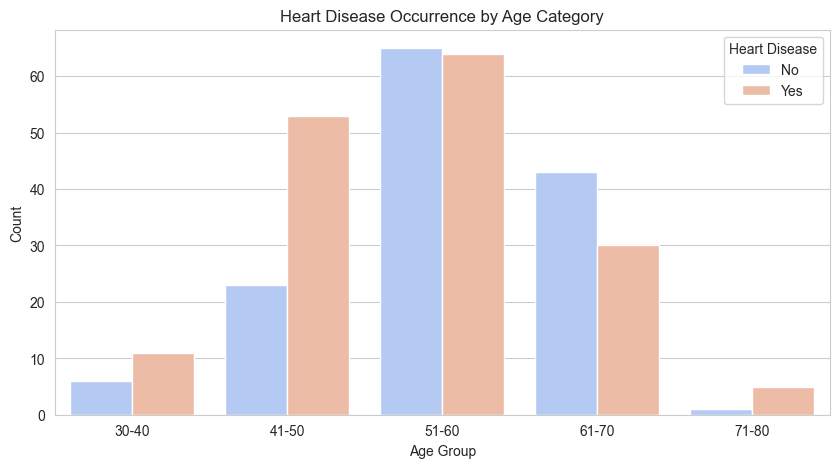

In [63]:
# Plot heart disease occurrence by age category
plt.figure(figsize=(10,5))
sns.countplot(data = df_clean, x = 'age_category', hue = 'target', palette='coolwarm')
plt.title("Heart Disease Occurrence by Age Category")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No","Yes"])
plt.show()

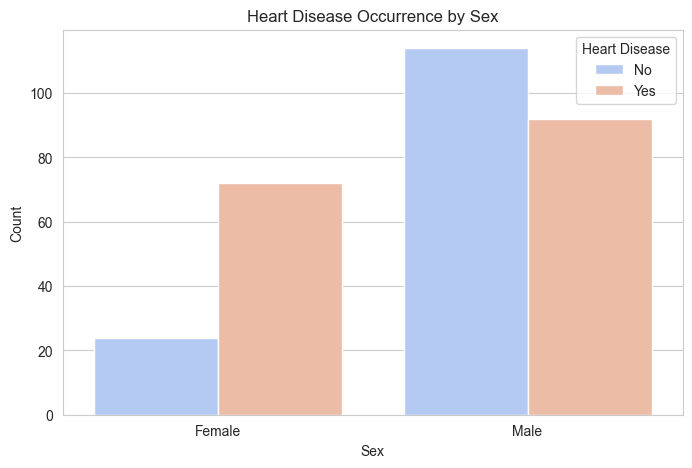

In [64]:
# Plot distribution of patients by sex category and heart disease occurrence
plt.figure(figsize=(8,5))
sns.countplot(data=df_clean, x='sex', hue='target', palette="coolwarm")
plt.xticks([0, 1], ["Female", "Male"])
plt.title("Heart Disease Occurrence by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()

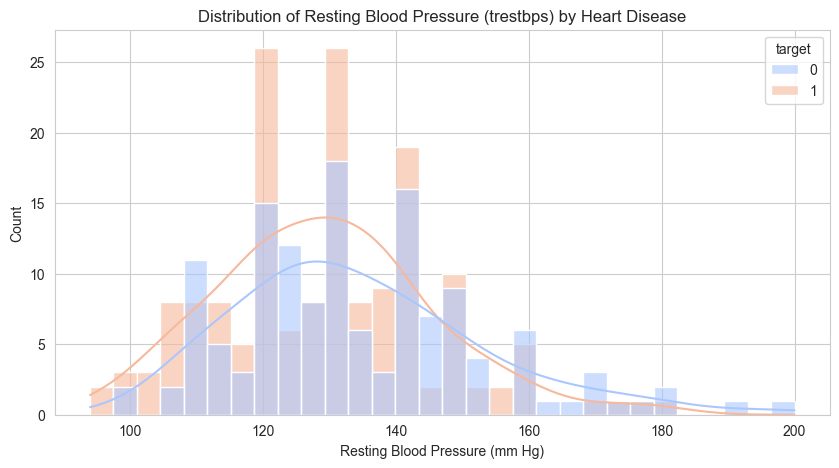

In [65]:
# Plot distribution of resting blood pressure by heart disease occurrence
plt.figure(figsize=(10,5))
sns.histplot(data=df_clean, x="trestbps", hue="target", kde=True, bins=30, palette="coolwarm", alpha=0.6)
plt.title("Distribution of Resting Blood Pressure (trestbps) by Heart Disease")
plt.xlabel("Resting Blood Pressure (mm Hg)")
plt.ylabel("Count")
plt.show()


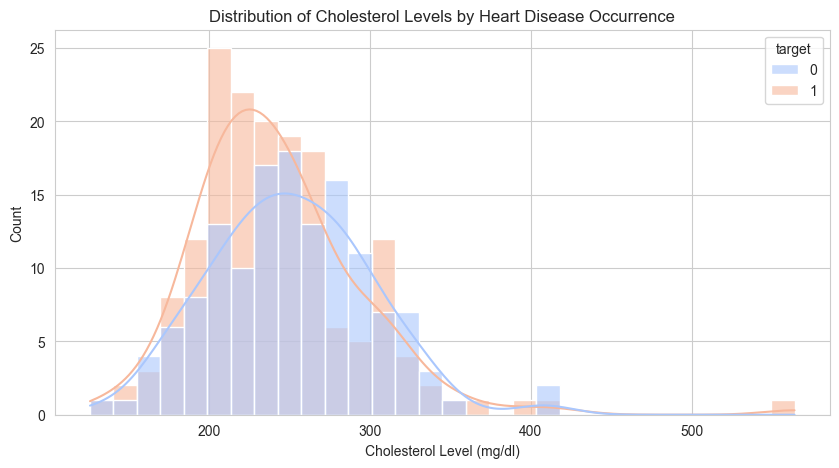

In [66]:
# Plot cholesterol distribution by heart disease occurrence
plt.figure(figsize=(10,5))
sns.histplot(data=df_clean, x="chol", hue="target", kde=True, bins=30, palette="coolwarm", alpha=0.6)
plt.title("Distribution of Cholesterol Levels by Heart Disease Occurrence")
plt.xlabel("Cholesterol Level (mg/dl)")
plt.ylabel("Count")
plt.show()


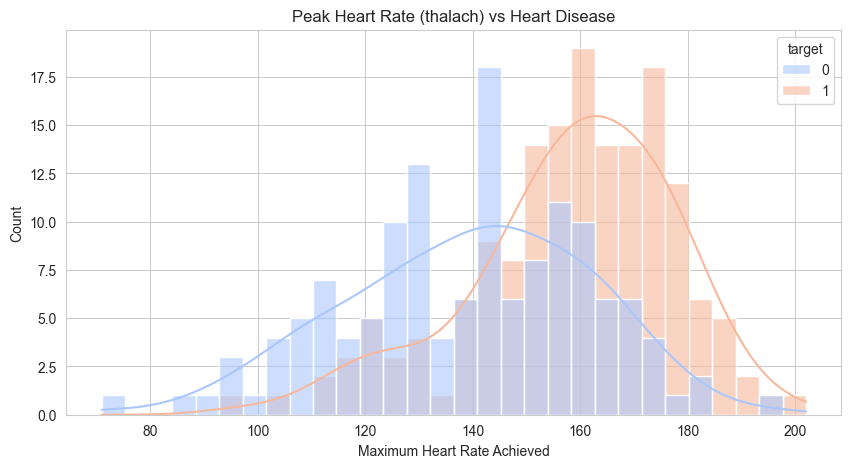

In [67]:
# Analyze peak exercising and heart disease
plt.figure(figsize=(10,5))
sns.histplot(data=df_clean, x="thalach", hue="target", kde=True, bins=30, palette="coolwarm", alpha=0.6)
plt.title("Peak Heart Rate (thalach) vs Heart Disease")
plt.xlabel("Maximum Heart Rate Achieved")
plt.ylabel("Count")
plt.show()

<Figure size 800x500 with 0 Axes>

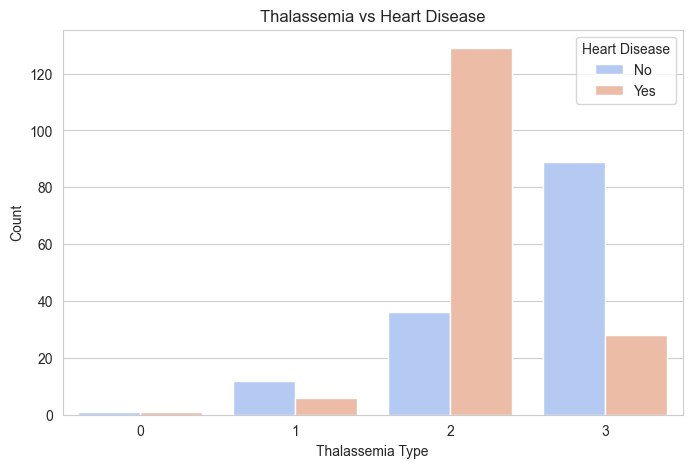

In [68]:
# Analyze thalassemia and heart disease
plt.figure(figsize=(8,5))
plt.figure(figsize=(8,5))
sns.countplot(data=df_clean, x='thal', hue='target', palette="coolwarm")
plt.title("Thalassemia vs Heart Disease")
plt.xlabel("Thalassemia Type")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()

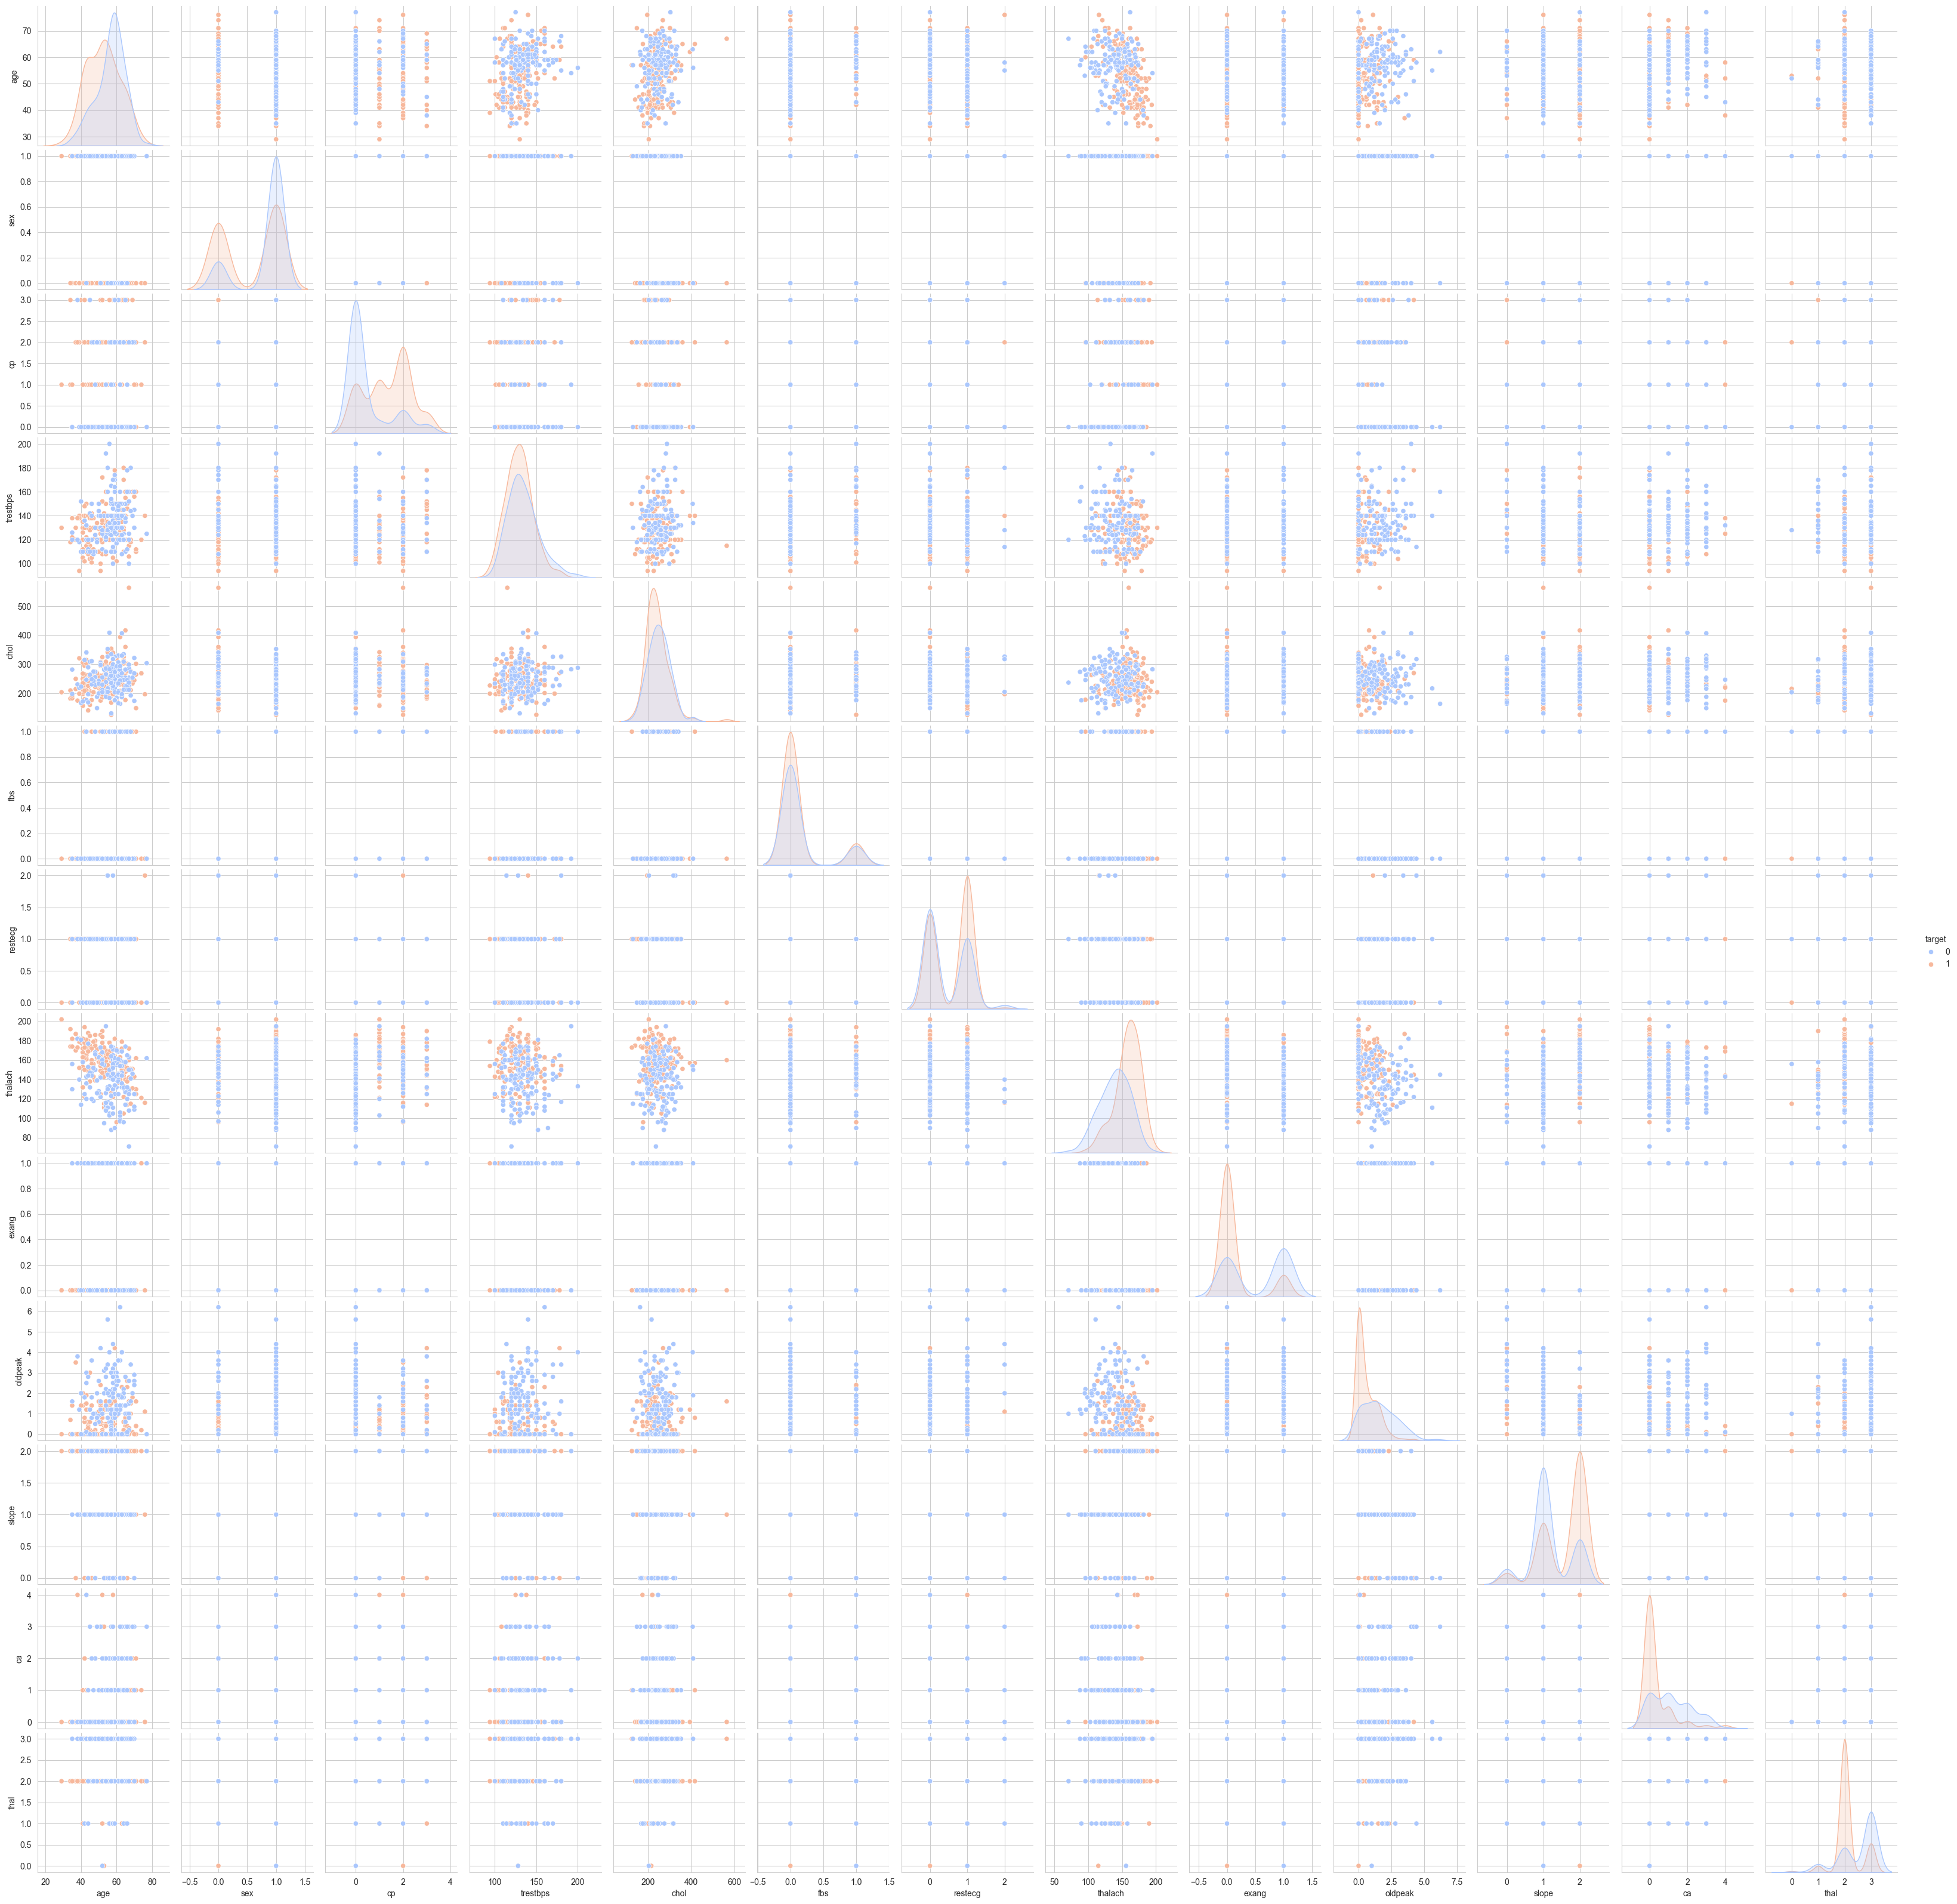

In [69]:
# Pair plot to explore relationships
sns.pairplot(df_clean, hue='target', diag_kind='kde', palette="coolwarm")
plt.show()

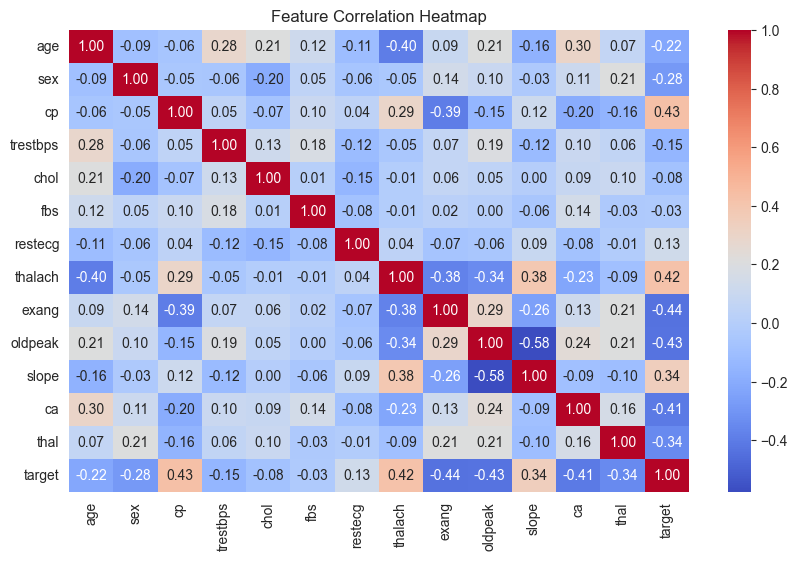

In [78]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_clean.select_dtypes(include=["float64", "int64"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [71]:
# Prepare data for model
X = df_clean.drop(columns=['target','age_category'])
Y = df_clean['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [72]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
# Logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [74]:
Y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(Y_test, Y_pred_lr))
print(classification_report(Y_test, Y_pred_lr))

Logistic Regression Accuracy: 0.819672131147541
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [75]:
# Random Forest Model
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [76]:
Y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(Y_test, Y_pred_rf))
print(classification_report(Y_test, Y_pred_rf))

Random Forest Accuracy: 0.8688524590163934
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [77]:
# Feature Selection using Logistic Regression (Statsmodels)
X_const = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_const)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.347733
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  241
Model:                          Logit   Df Residuals:                      227
Method:                           MLE   Df Model:                           13
Date:                Mon, 10 Mar 2025   Pseudo R-squ.:                  0.4950
Time:                        15:51:27   Log-Likelihood:                -83.804
converged:                       True   LL-Null:                       -165.95
Covariance Type:            nonrobust   LLR p-value:                 2.662e-28
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1611      0.205      0.786      0.432      -0.241       0.563
x1             0.0259      0.